In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats
from scipy.stats import linregress
import copy


## IDEAL POLYMERS

2D ideal polymer


In [17]:
# 2D IDEAL POLYMER

# Spacial configuration
config_2D = [[1,0],[0,1],[-1,0],[0,-1]]
choices = np.array([0,1,2,3])


# Crea array de movimiento en 2D
def create_dirs(N):
    dir = np.zeros(N)
    for i in np.arange(1,N):
        j = random.choice(choices)  
        while ((dir[i-1] + len(choices)/2)%(len(choices))==j):
            # Si el resto es 0, movimiento penalizado. Vuelve a generar número aleatorio
            j = random.choice(choices) 
        dir[i] = j
    return dir


Text(0, 0.5, 'y')

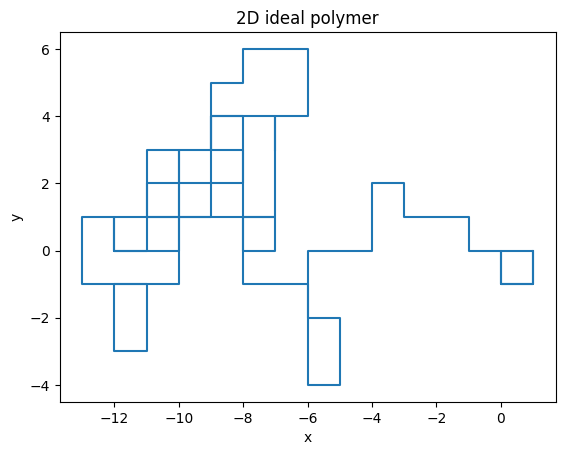

In [18]:
# num monomeros
N = 100 
monom = np.arange(0,N)

# num repeticiones
rep = 1000

# Posición de cada monómero
X = np.zeros(N)
Y = np.zeros(N)

# arrays para calcular Rg^2 y Rp^2
Rg = np.zeros(N)
Rp = np.zeros(N)

# Lista que almacena arrays
RG = []
RP = []

# Ejecuto 1000 veces un array de 100 monómeros
for l in range(rep):
    # Creo array de direcciones
    dir = create_dirs(N)
    Rp = np.zeros(N)
    Rg = np.zeros(N)
    Rcmx = 0
    Rcmy = 0
    X = np.zeros(N)
    Y = np.zeros(N)

    for i in range(N):
        # Mueve el siguiente monómero según dir
        if i==0:
            X[i] = 1
            Y[i] = 0

            # Calcula un Rg y un Rp
            R= []
            R = [X[i]-X[0], Y[i]-Y[0]]
            Rp[i] =  (R[0]**2 + R[1]**2)
            Rcmx = np.sum(X)/(i+1)
            Rcmy = np.sum(Y)/(i+1)
            Rg[i] = ((X[i]-Rcmx)**2+(Y[i]-Rcmy)**2)
        else:
            if dir[i]==choices[0]:
                    # Assign coordinates
                    X[i]= X[i-1] + config_2D[choices[0]][0]
                    Y[i]= Y[i-1] + config_2D[choices[0]][1]
            if dir[i]==choices[1]:
                    # Assign coordinates
                    X[i]= X[i-1] + config_2D[choices[1]][0]
                    Y[i]= Y[i-1] + config_2D[choices[1]][1]
            if dir[i]==choices[2]:
                    # Assign coordinates
                    X[i]= X[i-1] + config_2D[choices[2]][0]
                    Y[i]= Y[i-1] + config_2D[choices[2]][1]
            if dir[i]==choices[3]:
                    # Assign coordinates
                    X[i]= X[i-1] + config_2D[choices[3]][0]
                    Y[i]= Y[i-1] + config_2D[choices[3]][1]
            # Calcula Rg y Rp
            R= []
            R = [X[i]-X[0], Y[i]-Y[0]]
            Rp[i] =  R[0]**2 + R[1]**2
            Rcmx = np.sum(X)/(i+1)
            Rcmy = np.sum(Y)/(i+1)
            Rg[i] = ((X[i]-Rcmx)**2+(Y[i]-Rcmy)**2)
    RP+=[Rp]
    RG+=[Rg]

# Estos son los arrays finales finales de Rg^2 y Rp^2
FINALRP = np.zeros(N)
FINALRG = np.zeros(N)

for j in range(len(FINALRP)):
    sum=0
    fum = 0
    for k in range(rep):
        sum+=RP[k][j]
        fum+= RG[k][j]
    FINALRP[j] = sum/rep
    FINALRG[j] = fum/rep

# Print the polymer in 2D
plt.plot(X,Y)
plt.title('2D ideal polymer')
plt.xlabel('x')
plt.ylabel('y')


Resultado ideal pendiente RP^2 =  1
Pendiente RP^2  1.0744187209404055
Error relativo  7.441872094040547  %
Pendiente RG^2  1.1084229521457853
Error relativo  10.842295214578535  %


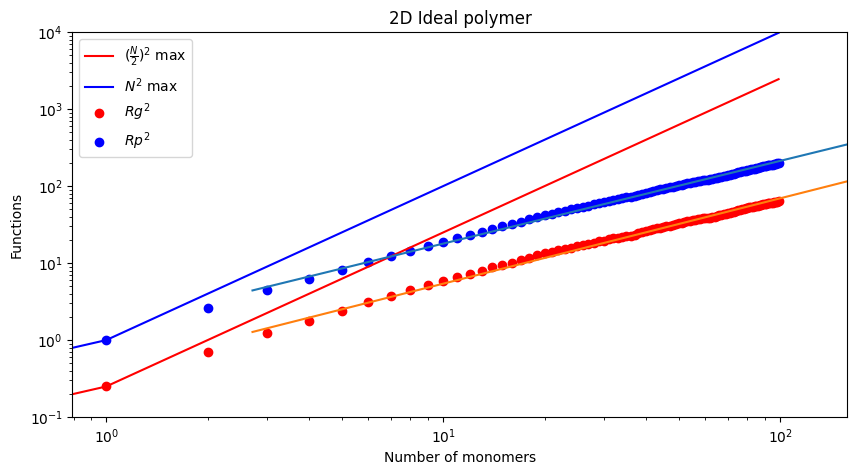

In [19]:
# Ajustamos linealmente los datos mediante regresión lineal

# log of monomers
p = np.log(np.arange(1,N))

print('Resultado ideal pendiente RP^2 = ', 1)
# Recta ajuste RP^2
resp = stats.linregress(p, np.log(FINALRP[1:]))
print('Pendiente RP^2 ', resp.slope)
print('Error relativo ', 100*np.abs((resp.slope-1)), ' %')

# Recta ajuste RP^2
resg = stats.linregress(p, np.log(FINALRG[1:]))
print('Pendiente RG^2 ', resg.slope)
print('Error relativo ', 100*np.abs((resg.slope-1)), ' %')

# Print computational results and the adjusted lines
fig, ax = plt.subplots(figsize=(10,5))

plt.plot(monom, np.array(range(N))**2/4, label=r'$(\frac{N}{2})^2$ max', color='r' )
plt.plot(monom, np.array(range(N))**2, label=r'$N^2$ max', color='b' )
plt.scatter(monom, FINALRG, label=r'$Rg^2$', color='r')
plt.scatter(monom, FINALRP, label=r'$Rp^2$', color='b')
plt.plot(np.exp(np.arange(1,N)), np.exp(resp.intercept) * np.exp(resp.slope*range(1,N)))
plt.plot(np.exp(np.arange(1,N)), np.exp(resg.intercept) * np.exp(resg.slope*range(1,N)))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([10**(-0.1), 10**(2.2)])
ax.set_ylim([10**(-1),10**(4)])
plt.title('2D Ideal polymer')
plt.xlabel('Number of monomers')
plt.ylabel('Functions')
plt.legend(loc= 'upper left')



Text(0.5, 0.92, '3D Ideal polymer')

<Figure size 640x480 with 0 Axes>

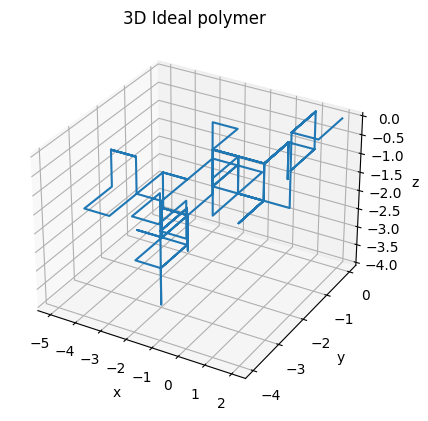

In [20]:
# 3D system

config_3D = [[1,0,0],[-1,0,0],
             [0,1,0],[0,-1,0],
             [0,0,1],[0,0,-1]]

# Instead of numbers for each position, I check if the new position and the 
# previous one are not opposite. Then I add a new array from config_3D to my array
# of positions

# num monomeros
N = 100
monom = np.arange(0,N)

# num repeticiones
rep = 1000

# Array posiciones 3D
XYZ = np.zeros(shape=(N,3))
XYZ[0] = config_3D[0] 

def create_dirs3d(XYZ, N):
     for i in range(1,N):
        j = random.choice(config_3D)  
        XYZ[i] = XYZ[i-1] + j
        while np.all((XYZ[i]-XYZ[i-1])==(XYZ[i-1]-XYZ[i-2])):
            XYZ[i] = XYZ[i-1] +  random.choice(config_3D)  
     return XYZ

fig = plt.figure()
ax = plt.figure().add_subplot(111,projection='3d')
DIR= np.zeros(shape=(N,3))
DIR = create_dirs3d(XYZ,N)
ax.plot(DIR[:,0], DIR[:,1], DIR[:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('3D Ideal polymer')



In [21]:
# Now we compute Rg and Rp in a similar manner

# Lista que almacena arrays
RG3d = []
RP3d = []


for l in range(rep):
    # Create new polymer
    XYZ = np.zeros(shape=(N,3))
    dirs = np.zeros(shape=(N,3))
    XYZ[0] = config_3D[0]
    dirs[0] = config_3D[0]
    dirs = create_dirs3d(copy.deepcopy(XYZ), N)  
    Rp = np.zeros(N)
    Rg = np.zeros(N)

    for i in range(N):
        Rcmx, Rcmy, Rcmz = 0,0,0
        # Create the R end-to-end polymer vector
        R = []
        R = [dirs[i,0]-dirs[0][0], dirs[i,1]-dirs[0][1], dirs[i,2]-dirs[0][2]]
        Rp[i]= (R[0]**2 + R[1]**2 + R[2]**2)

        # Compute Rg
        Rcmx = np.sum(dirs[:(i+1),0])/(i+1)
        Rcmy = np.sum(dirs[:(i+1),1])/(i+1)
        Rcmz = np.sum(dirs[:(i+1),2])/(i+1)
        Rg[i] = ((dirs[i,0]- Rcmx)**2 + (dirs[i,1]- Rcmy)**2 + (dirs[i,2]- Rcmz)**2)
    RP3d+=[Rp]
    RG3d+=[Rg]

# Estos son los arrays finales finales de Rg^2 y Rp^2
FINALRP3d = np.zeros(N)
FINALRG3d = np.zeros(N)


# Cálculo estadístico
for j in range(len(FINALRP)):
    sum=0
    fum = 0
    for k in range(rep):
        sum+=RP3d[k][j]
        fum+= RG3d[k][j]
    FINALRP3d[j] = sum/rep
    FINALRG3d[j] = fum/rep


Resultado ideal pendiente RP^2 =  1
Pendiente RP^2  0.9488968700002712
Error relativo  5.1103129999728765  %
Pendiente RG^2  0.9762710404952919
Error relativo  2.3728959504708103  %


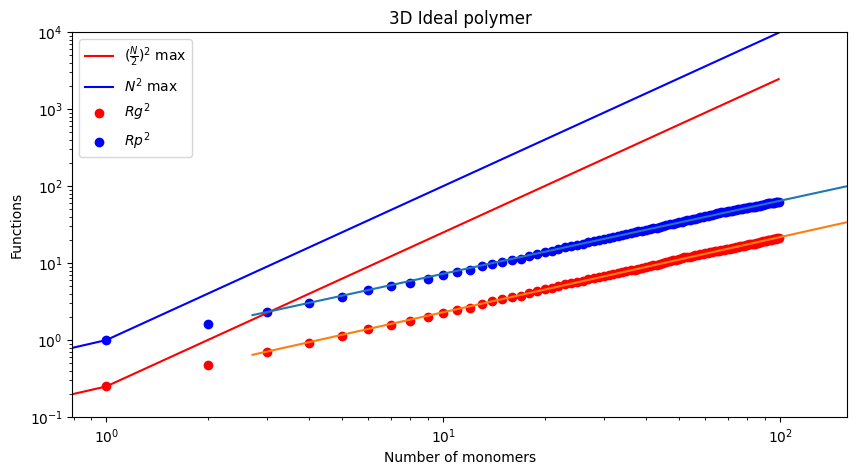

In [22]:
# log of monomers
p = np.log(np.arange(1,N))

print('Resultado ideal pendiente RP^2 = ', 1)
# Recta ajuste RP^2
resp = stats.linregress(p, np.log(FINALRP3d[1:]))
print('Pendiente RP^2 ', resp.slope)
print('Error relativo ', 100*np.abs((resp.slope-1)), ' %')

# Recta ajuste RP^2
resg = stats.linregress(p, np.log(FINALRG3d[1:]))
print('Pendiente RG^2 ', resg.slope)
print('Error relativo ', 100*np.abs((resg.slope-1)), ' %')

# Print computational results and the adjusted lines
fig, ax = plt.subplots(figsize=(10,5))

plt.plot(monom, np.array(range(N))**2/4, label=r'$(\frac{N}{2})^2$ max', color='r' )
plt.plot(monom, np.array(range(N))**2, label=r'$N^2$ max', color='b' )
plt.scatter(monom, FINALRG3d, label=r'$Rg^2$', color='r')
plt.scatter(monom, FINALRP3d, label=r'$Rp^2$', color='b')
plt.plot(np.exp(np.arange(1,N)), np.exp(resp.intercept) * np.exp(resp.slope*range(1,N)))
plt.plot(np.exp(np.arange(1,N)), np.exp(resg.intercept) * np.exp(resg.slope*range(1,N)))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([10**(-0.1), 10**(2.2)])
ax.set_ylim([10**(-1),10**(4)])
plt.title('3D Ideal polymer')
plt.xlabel('Number of monomers')
plt.ylabel('Functions')
plt.legend(loc= 'upper left')

## ROSEBLUTH POLYMERS


Estos dos primeros algoritmos están diseñados para parar cuando el polímero no tenga más opciones de avance

In [23]:
# 2D version
config_2D = [[1,0],[0,1],[-1,0],[0,-1]]

# Total number of monomers
N = 100
monom = np.arange(0,N)

# Posición de cada monómero
XY = np.zeros(shape=(N,2))

def dirs_Rose_2d(XY,N):
    m = []
    arr = np.zeros(shape=(1, 2))
    i=0
    while i<N:
        #print(i)
        if i==0:
            XY[i] =  random.choice(config_2D)
            m.append(4) 
            i+=1
            
        else:
            arr = XY[i-1].copy()
            allowed_dirs = []
            for direction in config_2D: # Directly choose a direction
                new_position = arr + np.array(direction)
                if not any(np.all((new_position == pos)) for pos in XY[:i]):
                    allowed_dirs.append(direction)
            m.append(len(allowed_dirs))
            if (m[i]==0):
                break
                 
            else:
               XY[i] = arr+ random.choice(allowed_dirs)
            i+=1
    return XY, m


Text(0, 0.5, 'y')

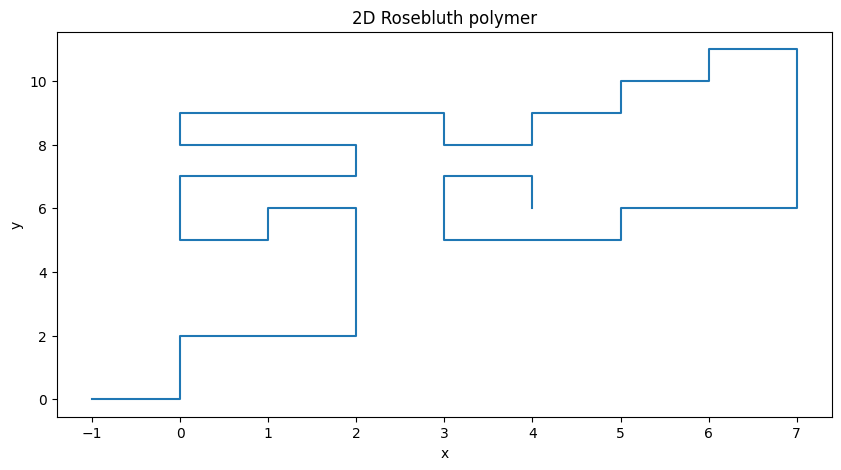

In [24]:
fig, ax = plt.subplots(figsize=(10,5))
res_XY, res_m = dirs_Rose_2d(XY,N)

# Find the last index of the polymer
last_index = len(res_m)

# Find the last non-zero index or use last_index if there are no zeros
last_nonzero_index = next((i for i, value in enumerate(res_m) if value == 0), last_index)

# We only plot until m=0
plt.plot(res_XY[:last_nonzero_index,0], res_XY[:last_nonzero_index,1]  )
plt.title('2D Rosebluth polymer')
plt.xlabel('x')
plt.ylabel('y')

Text(0.5, 0.92, '3D Rosebluth polymer')

<Figure size 640x480 with 0 Axes>

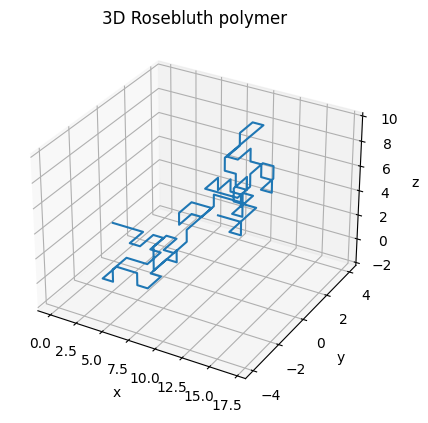

In [25]:
# 3D version
config_3D = [[1,0,0],[-1,0,0],
             [0,1,0],[0,-1,0],
             [0,0,1],[0,0,-1]]


N = 100
rep = 1000

i = 0
m= []
XYZ = np.zeros(shape=(N,3))
while i<N:
        arr = np.zeros(shape=(1, 3))
        if i==0:
            XYZ[i] =  random.choice(config_3D)
            m.append(6) 
            i+=1
        else:
            arr = XYZ[i-1].copy()
            allowed_dirs = []
            for direction in config_3D:
                new_position =  arr + np.array(direction) 
                if not any(np.all(new_position==pos) for pos in XYZ[:i]):
                    if not np.all(new_position == arr):
                        allowed_dirs.append(direction)
            m.append(len(allowed_dirs))
            if (m[-1]==0): 
                break
            else:
                XYZ[i] = arr +  random.choice(allowed_dirs)
            i+=1
    

'''
# Check if any point is equal along the whole XYZ array
for i in range(1,N):
    if np.any(np.all(XYZ[i] == XYZ)):
        print('Polymer crosses itself!')
        break
    else:
        print('no se cruza')
'''

fig = plt.figure()
ax = plt.figure().add_subplot(111,projection='3d')
ax.plot(XYZ[:,0], XYZ[:,1], XYZ[:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('3D Rosebluth polymer')


Algoritmos para hacer polímeros de N monómeros fijos con los que calcular RP^2 y RG^2

2D ROSEBLUTH POLYMER

In [26]:
N = 100
rep = 1000

# Intermediate arrays
RG2d = []
RP2d = []
W2d = []

config_2D = [[1, 0], [0, 1], [-1, 0], [0, -1]]

for s in range(rep):
    # Position list
    XY = []

    # Intermediate lists
    m = []
    Rp = np.zeros(N)
    Rg = np.zeros(N)
    M = np.zeros(N)
    Rcmx, Rcmy = 0, 0

    # Create a polymer up to N
    # In each repetition compute RG and RP
    while len(XY) < N:
        arr = [0, 0]
        i = len(XY)
        #print(i)
        if len(XY) == 0:
            XY.append(random.choice(config_2D))
            m.append(4)
            # Compute RP
            R=[]
            R = [XY[-1][0] - XY[0][0], XY[-1][1] - XY[0][1]]
            Rp[len(XY)-1] = (R[0]**2 + R[1]**2)

            # Compute RG
            Rcmx, Rcmy = (
                np.sum([pos[0] for pos in XY[:i+1]]) / (i + 1),
                np.sum([pos[1] for pos in XY[:i+1]]) / (i + 1),
            )
            Rg[i] = (
                (XY[-1][0] - Rcmx) ** 2 + (XY[-1][1] - Rcmy) ** 2
            )
        else:
            arr = copy.copy(XY[-1])
            allowed_dirs = []
            for direction in config_2D:
                new_position = [a + b for a, b in zip(arr, direction)]
                if not any(all(x == pos[i] for i, x in enumerate(new_position)) for pos in XY):
                    allowed_dirs.append(direction)
            m.append(len(allowed_dirs))
            if m[-1] == 0:
                XY = []
                m = []
                Rcmx, Rcmy = 0, 0
                continue
            else:
                XY.append([a + b for a, b in zip(arr, random.choice(allowed_dirs))])
                # Compute RP
                R=[]
                R = [XY[-1][0] - XY[0][0], XY[-1][1] - XY[0][1]]
                Rp[len(XY)-1] = (R[0] ** 2 + R[1] ** 2)

                # Compute RG
                Rcmx, Rcmy = (
                    np.sum([pos[0] for pos in XY[:i+1]]) / (i + 1),
                    np.sum([pos[1] for pos in XY[:i+1]]) / (i + 1),
                )
                Rg[i] = (
                    (XY[-1][0] - Rcmx) ** 2 + (XY[-1][1] - Rcmy) ** 2
                )
    g = 1
    for j in range(len(m)):
        g *= m[j]
        M[j] = g
    RP2d.append(Rp)
    RG2d.append(Rg)
    W2d.append(M)

# Arrays finales
FINALRP2d = np.zeros(N)
FINALRG2d = np.zeros(N)

for j in range(N):
    sum_rp = 0
    sum_rg = 0
    sum_w = 0
    for k in range(rep):
        sum_rp += W2d[k][j] * RP2d[k][j]
        sum_rg += W2d[k][j] * RG2d[k][j]
        sum_w += W2d[k][j]
    FINALRP2d[j] = sum_rp / sum_w
    FINALRG2d[j] = sum_rg / sum_w



Resultado ideal pendiente RP^2 =  1.5
Pendiente RP^2  1.4317450799052096
Error relativo  6.8254920094790394  %
Pendiente RG^2  1.4607779237735061
Error relativo  3.9222076226493874  %


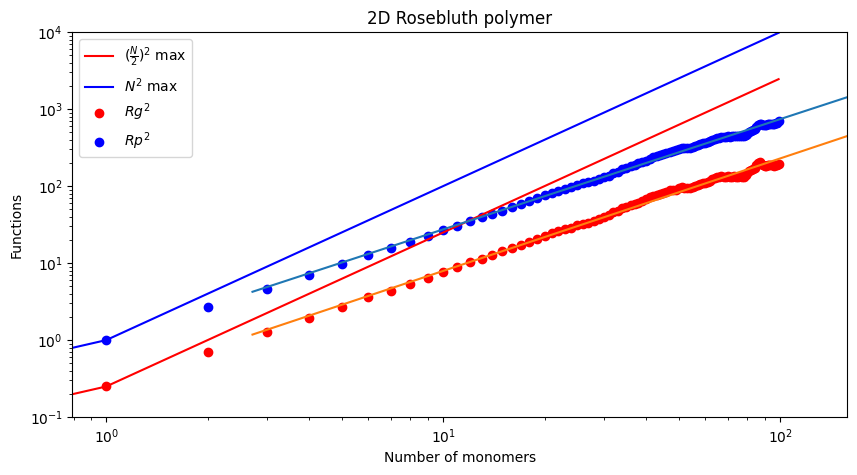

In [27]:
# Adjust the lines in order to obtain the power

# log of monomers
p = np.log(np.arange(1,N))

print('Resultado ideal pendiente RP^2 = ', 1.5)
# Recta ajuste RP^2
resp = stats.linregress(p, np.log(FINALRP2d[1:]))
print('Pendiente RP^2 ', resp.slope)
print('Error relativo ', 100*np.abs((resp.slope-1.5)), ' %')

# Recta ajuste RP^2
resg = stats.linregress(p, np.log(FINALRG2d[1:]))
print('Pendiente RG^2 ', resg.slope)
print('Error relativo ', 100*np.abs((resg.slope-1.5)), ' %')

# Print computational results and the adjusted lines
fig, ax = plt.subplots(figsize=(10,5))

plt.plot(monom, np.array(range(N))**2/4, label=r'$(\frac{N}{2})^2$ max', color='r' )
plt.plot(monom, np.array(range(N))**2, label=r'$N^2$ max', color='b' )
plt.scatter(monom, FINALRG2d, label=r'$Rg^2$', color='r')
plt.scatter(monom, FINALRP2d, label=r'$Rp^2$', color='b')
plt.plot(np.exp(np.arange(1,N)), np.exp(resp.intercept) * np.exp(resp.slope*range(1,N)))
plt.plot(np.exp(np.arange(1,N)), np.exp(resg.intercept) * np.exp(resg.slope*range(1,N)))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([10**(-0.1), 10**(2.2)])
ax.set_ylim([10**(-1),10**(4)])
plt.title('2D Rosebluth polymer')
plt.xlabel('Number of monomers')
plt.ylabel('Functions')
plt.legend(loc= 'upper left')

3D ROSEBLUTH POLYMER

In [28]:
# 3D polymer 

XYZ = []
m=[]

RG3d = []
RP3d = []
W3d = []


for i in range(rep):
        XYZ = []
        m=[]
        Rp = np.zeros(N)
        Rg = np.zeros(N)
        M = np.zeros(N)
        Rcmx, Rcmy, Rcmz = 0,0,0
        # Create a polymer up to N 
        # In each repetition compute RG and RP
        while len(XYZ)<N:
                arr = [0,0,0]
                i = len(XYZ)
                if len(XYZ)==0:
                    XYZ.append(random.choice(config_3D))
                    m.append(6)
                    # Compute RP
                    R = []
                    R = [XYZ[-1][0] - XYZ[0][0], XYZ[-1][1] - XYZ[0][1], XYZ[-1][2] - XYZ[0][2]]
                    Rp[len(XYZ)-1]= (R[0]**2 + R[1]**2 + R[2]**2)
                    # Compute RG
                    Rcmx, Rcmy, Rcmz = (
                        np.sum([pos[0] for pos in XYZ[: i + 1]]) / (i + 1),
                        np.sum([pos[1] for pos in XYZ[: i + 1]]) / (i + 1),
                        np.sum([pos[2] for pos in XYZ[: i + 1]]) / (i + 1),
                    )
                    Rg[i] = (
                        (XYZ[-1][0] - Rcmx) ** 2 + (XYZ[-1][1] - Rcmy) ** 2 + (XYZ[-1][2] - Rcmz) ** 2
                    )

                else:
                    arr = copy.copy(XYZ[-1])
                    allowed_dirs = []
                    for direction in config_3D:
                        new_position = [a + b for a, b in zip(arr, direction)]
                        if not any(all(x == pos[i] for i, x in enumerate(new_position)) for pos in XYZ):
                            allowed_dirs.append(direction)
                    m.append(len(allowed_dirs))
                    if m[-1] == 0:
                        XYZ = []
                        m = []
                        Rcmx, Rcmy, Rcmz = 0,0,0
                        continue
                    else:
                        XYZ.append([a + b for a, b in zip(arr, random.choice(allowed_dirs))])
                        # Compute Rp
                        R = []
                        R = [XYZ[-1][0] - XYZ[0][0], XYZ[-1][1] - XYZ[0][1], XYZ[-1][2] - XYZ[0][2]]
                        Rp[len(XYZ)-1]= (R[0]**2 + R[1]**2 + R[2]**2)
                        # Compute Rg
                        Rcmx, Rcmy, Rcmz = (
                        np.sum([pos[0] for pos in XYZ[: i + 1]]) / (i + 1),
                        np.sum([pos[1] for pos in XYZ[: i + 1]]) / (i + 1),
                        np.sum([pos[2] for pos in XYZ[: i + 1]]) / (i + 1),
                        )
                        Rg[i] = (
                            (XYZ[-1][0] - Rcmx) ** 2 + (XYZ[-1][1] - Rcmy) ** 2 + (XYZ[-1][2] - Rcmz) ** 2
                        )
        s=1
        for j in range(len(m)):
            s *= m[j]
            M[j] = s
        RP3d+=[Rp]
        RG3d+=[Rg]
        W3d+=[M]
       

FINALRP3d = np.zeros(N)
FINALRG3d = np.zeros(N)

FINALRP3d_stat = np.zeros(N)
FINALRG3d_stat = np.zeros(N)

for j in range(N):
    sum = 0
    zum = 0
    tum = 0
    sum_stats = 0
    fum_stats = 0
    for k in range(rep):
        sum += W3d[k][j]*RP3d[k][j]
        tum += W3d[k][j]*RG3d[k][j]
        zum += W3d[k][j]
        
        sum_stats+=RP3d[k][j]
        fum_stats+= RG3d[k][j]
    FINALRP3d[j] = sum/zum
    FINALRG3d[j] = tum/zum

    FINALRP3d_stat[j] = sum_stats/rep
    FINALRG3d_stat[j] = fum_stats/rep


# Next annotated code is for printing purposes

'''
# Check if any point is equal along the whole XYZ array
for i in range(1,N):
    if np.any(np.all(XYZ[i] == XYZ)):
        print('Polymer crosses itself!')
        break
    else:
        print('no se cruza')


new_XYZ = np.array(XYZ)
fig = plt.figure()
ax = plt.figure().add_subplot(111,projection='3d')
ax.plot(new_XYZ[:,0], new_XYZ[:,1], new_XYZ[:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
'''



"\n# Check if any point is equal along the whole XYZ array\nfor i in range(1,N):\n    if np.any(np.all(XYZ[i] == XYZ)):\n        print('Polymer crosses itself!')\n        break\n    else:\n        print('no se cruza')\n\n\nnew_XYZ = np.array(XYZ)\nfig = plt.figure()\nax = plt.figure().add_subplot(111,projection='3d')\nax.plot(new_XYZ[:,0], new_XYZ[:,1], new_XYZ[:,2])\nax.set_xlabel('x')\nax.set_ylabel('y')\nax.set_zlabel('z')\n"

Resultado ideal pendiente RP^2 =  1.2
Pendiente RP^2  1.186624735301888
Error relativo  1.337526469811201  %
Pendiente RG^2  1.214281335932293
Error relativo  1.4281335932293082  %

 RESULTADOS ANALISIS ESTADISTICO
Pendiente RP^2  1.0897023682339835
Error relativo  11.029763176601648  %
Pendiente RG^2  1.1300068904978116
Error relativo  6.99931095021884  %


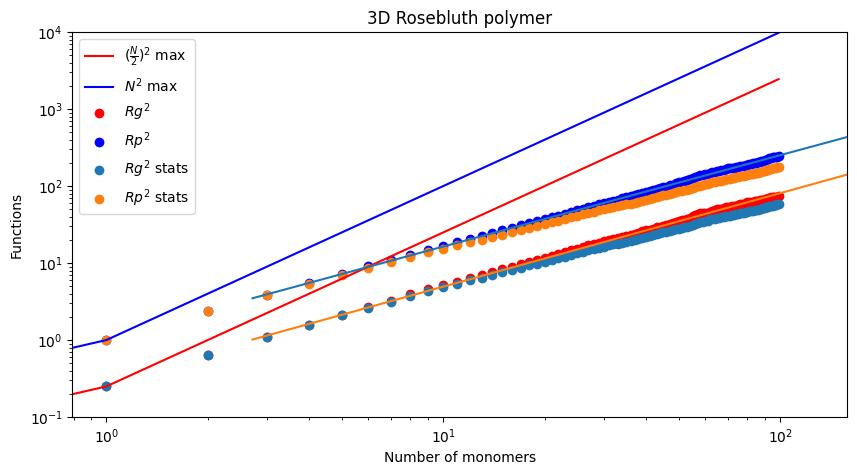

In [29]:
# Adjust the lines in order to obtain the power

# log of monomers
p = np.log(np.arange(1,N))

print('Resultado ideal pendiente RP^2 = ', 1.20)
# Recta ajuste RP^2
resp = stats.linregress(p, np.log(FINALRP3d[1:]))
print('Pendiente RP^2 ', resp.slope)
print('Error relativo ', 100*np.abs((resp.slope-1.20)), ' %')

# Recta ajuste RP^2
resg = stats.linregress(p, np.log(FINALRG3d[1:]))
print('Pendiente RG^2 ', resg.slope)
print('Error relativo ', 100*np.abs((resg.slope-1.20)), ' %')

print('\n RESULTADOS ANALISIS ESTADISTICO')
respstat = stats.linregress(p, np.log(FINALRP3d_stat[1:]))
print('Pendiente RP^2 ', respstat.slope)
print('Error relativo ', 100*np.abs((respstat.slope-1.20)), ' %')

# Recta ajuste RP^2
resgstat = stats.linregress(p, np.log(FINALRG3d_stat[1:]))
print('Pendiente RG^2 ', resgstat.slope)
print('Error relativo ', 100*np.abs((resgstat.slope-1.20)), ' %')


# Print computational results and the adjusted lines
fig, ax = plt.subplots(figsize=(10,5))

plt.plot(monom, np.array(range(N))**2/4, label=r'$(\frac{N}{2})^2$ max', color='r' )
plt.plot(monom, np.array(range(N))**2, label=r'$N^2$ max', color='b' )
plt.scatter(monom, FINALRG3d, label=r'$Rg^2$', color='r')
plt.scatter(monom, FINALRP3d, label=r'$Rp^2$', color='b')
plt.scatter(monom, FINALRG3d_stat, label=r'$Rg^2$ stats')
plt.scatter(monom, FINALRP3d_stat, label=r'$Rp^2$ stats')
plt.plot(np.exp(np.arange(1,N)), np.exp(resp.intercept) * np.exp(resp.slope*range(1,N)))
plt.plot(np.exp(np.arange(1,N)), np.exp(resg.intercept) * np.exp(resg.slope*range(1,N)))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([10**(-0.1), 10**(2.2)])
ax.set_ylim([10**(-1),10**(4)])
plt.title('3D Rosebluth polymer')
plt.xlabel('Number of monomers')
plt.ylabel('Functions')
plt.legend(loc= 'upper left')